In [88]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = [15, 8]
plt.rcParams['font.size'] = 18
BUCKET_SIZE = 3

In [89]:
train_data = pd.read_csv('../data/labeled_csv/val/sorted_train.csv')
print(train_data.shape)
print(train_data.head())

(20399, 4)
                     prev_img                    curr_img  category      speed
0  data/images/train/img0.jpg  data/images/train/img1.jpg        28  28.105569
1  data/images/train/img1.jpg  data/images/train/img2.jpg        28  28.105569
2  data/images/train/img2.jpg  data/images/train/img3.jpg        28  28.106527
3  data/images/train/img3.jpg  data/images/train/img4.jpg        28  28.130404
4  data/images/train/img4.jpg  data/images/train/img5.jpg        28  28.109243


In [124]:
y_pred_3 = pd.read_csv('../data/predictions/sorted_train/prediction_bucket_size_3_10_buckets.txt')
print(y_pred_3.shape)
print(y_pred_3.head())

(20416, 10)
          0         1         2         3         4         5         6  \
0  0.000001  0.000001  0.000009  0.000114  0.000421  0.000134  0.126008   
1  0.000002  0.000002  0.000014  0.000196  0.000779  0.000217  0.146346   
2  0.000003  0.000002  0.000018  0.000290  0.001052  0.000375  0.216042   
3  0.000014  0.000012  0.000073  0.001049  0.003811  0.001289  0.242432   
4  0.000006  0.000005  0.000035  0.000547  0.001802  0.000976  0.322337   

          7         8         9  
0  0.325577  0.524842  0.022893  
1  0.359564  0.462814  0.030065  
2  0.396381  0.349657  0.036180  
3  0.346444  0.337596  0.067282  
4  0.351162  0.266930  0.056198  


In [126]:
BUCKET_SIZE = 3
train_data['pred_category'] = np.argmax(a=y_pred_3.values, axis=-1)[:train_data.shape[0]]
y_pred_speed_3 = (train_data['pred_category'] + 0.5) * BUCKET_SIZE

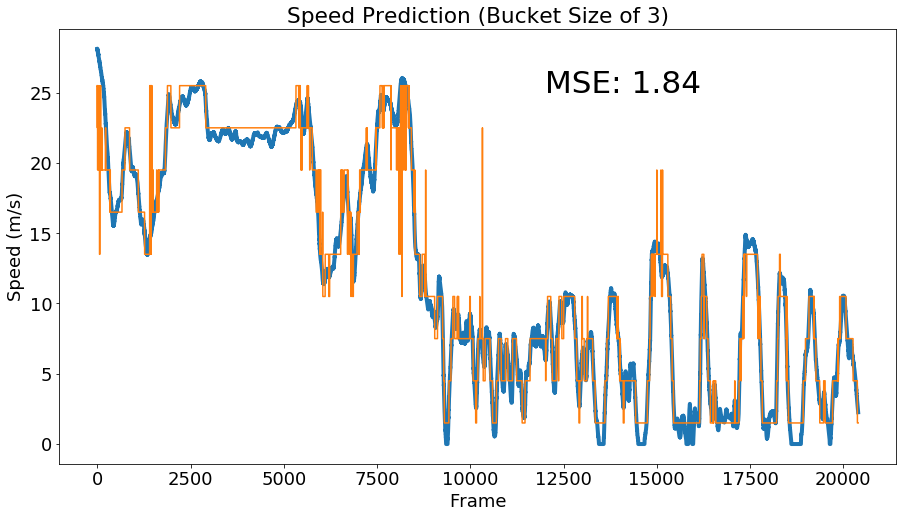

In [127]:
plt.plot(train_data['speed'], linewidth=4)
plt.plot(y_pred_speed_3)
plt.xlabel('Frame')
plt.ylabel('Speed (m/s)')
plt.title('Speed Prediction (Bucket Size of 3)')

mse = np.mean(np.square(train_data['speed'] - y_pred_speed_3))
plt.annotate(f'MSE: {mse:.2f}', xy=(12000, 25), fontsize='xx-large')
plt.show()

In [121]:
BUCKET_SIZE = 1
y_pred_1 = pd.read_csv('../data/predictions/sorted_train/prediction_bucket_size_1_29_buckets.txt')
y_pred_1 = np.argmax(a=y_pred_1.values, axis=-1)[:train_data.shape[0]]
y_pred_speed_1 = (y_pred_1 + 0.5) * BUCKET_SIZE

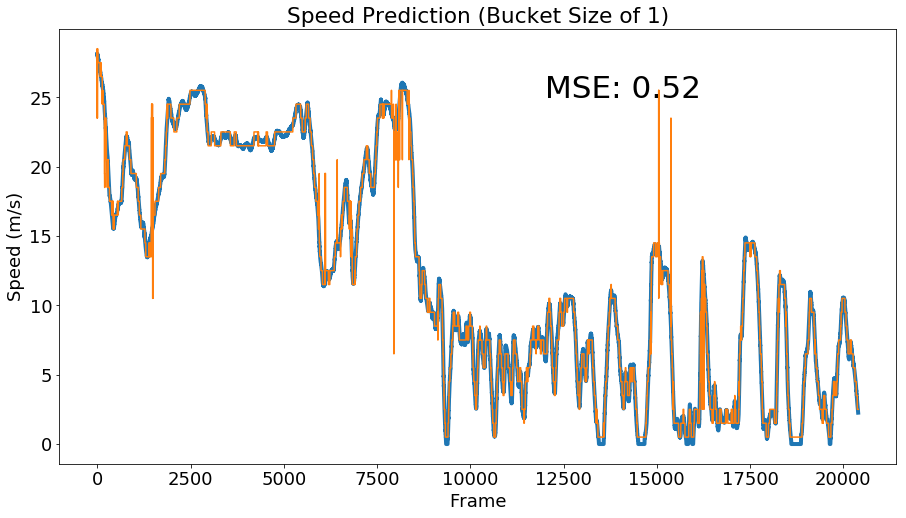

In [122]:
plt.plot(train_data['speed'], linewidth=4)
plt.plot(y_pred_speed_1)
plt.xlabel('Frame')
plt.ylabel('Speed (m/s)')
plt.title('Speed Prediction (Bucket Size of 1)')

mse = np.mean(np.square(train_data['speed'] - y_pred_speed_1))
plt.annotate(f'MSE: {mse:.2f}', xy=(12000, 25), fontsize='xx-large')
plt.show()

In [115]:
BUCKET_SIZE = 2
y_pred_2 = pd.read_csv('../data/predictions/sorted_train/prediction_bucket_size_2_15_buckets.txt')
y_pred_2 = np.argmax(a=y_pred_2.values, axis=-1)[:train_data.shape[0]]
y_pred_speed_2 = (y_pred_2 + 0.5) * BUCKET_SIZE

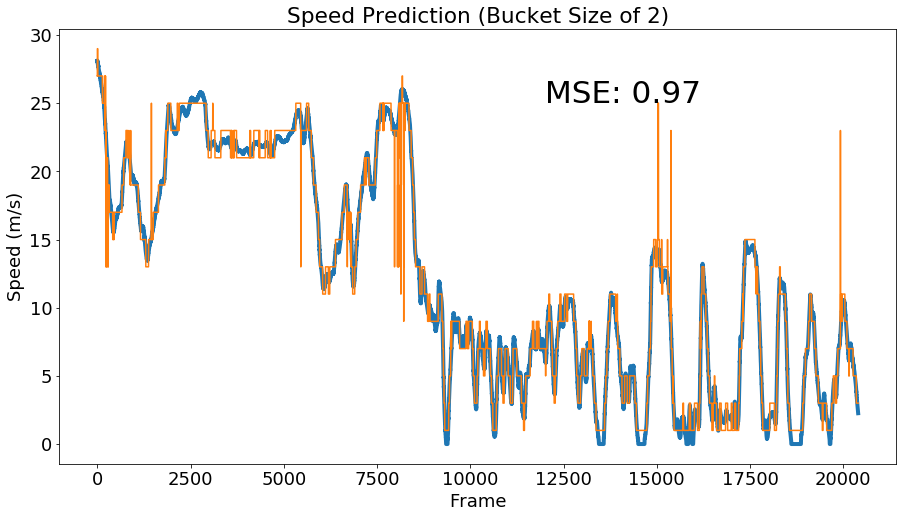

In [116]:
plt.plot(train_data['speed'], linewidth=4)
plt.plot(y_pred_speed_2)
plt.xlabel('Frame')
plt.ylabel('Speed (m/s)')
plt.title('Speed Prediction (Bucket Size of 2)')

mse = np.mean(np.square(train_data['speed'] - y_pred_speed_2))
plt.annotate(f'MSE: {mse:.2f}', xy=(12000, 25), fontsize='xx-large')
plt.show()

In [135]:
y_pred_speed_avg = np.mean([y_pred_speed_1, y_pred_speed_2, y_pred_speed_3], axis = 0)

In [136]:
y_pred_speed_avg

array([25.33333333, 25.33333333, 26.        , ...,  2.33333333,
        2.33333333,  2.33333333])

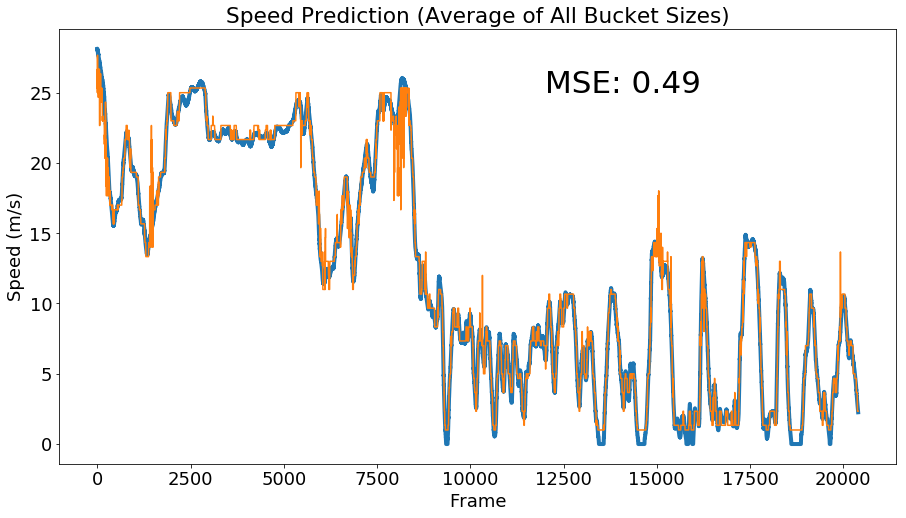

In [138]:
plt.plot(train_data['speed'], linewidth=4)
plt.plot(y_pred_speed_avg)
plt.xlabel('Frame')
plt.ylabel('Speed (m/s)')
plt.title('Speed Prediction (Average of All Bucket Sizes)')

mse = np.mean(np.square(train_data['speed'] - y_pred_speed_avg))
plt.annotate(f'MSE: {mse:.2f}', xy=(12000, 25), fontsize='xx-large')
plt.show()